In [4]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [5]:
EXPERIMENT_NAME = 'P3856'
RUN_NAME = 'P3856_YHE211_1_Slot1-1_1_5104'

In [6]:
precursor_id = 1000

In [9]:
before_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/{}-{}-ms2-before-mass-defect-filter-precursor-{}.csv'.format(EXPERIMENT_NAME, RUN_NAME, precursor_id))
after_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/{}-{}-ms2-after-mass-defect-filter-precursor-{}.csv'.format(EXPERIMENT_NAME, RUN_NAME, precursor_id))

In [10]:
not_in_defect_window_df = before_df[~before_df.mz.isin(after_df.mz)]

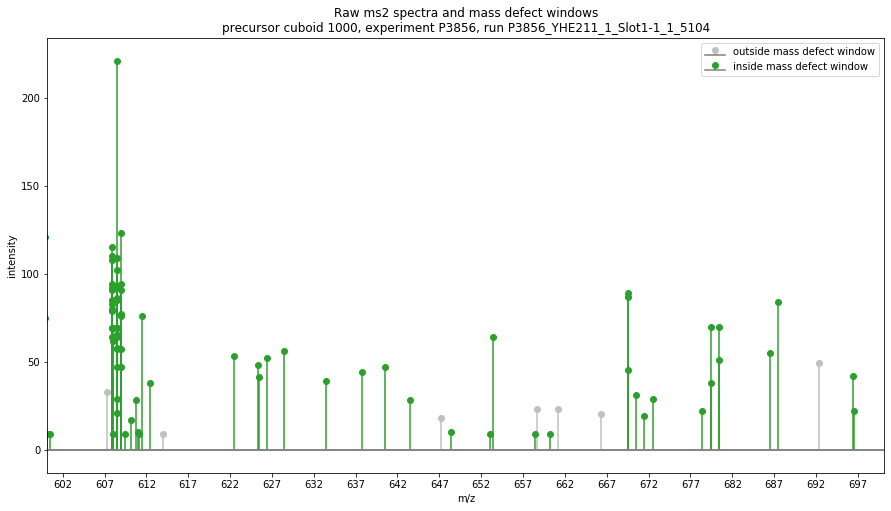

In [11]:
f, ax = plt.subplots()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

markerline, stemlines, baseline = ax.stem(not_in_defect_window_df.mz, not_in_defect_window_df.intensity, label='outside mass defect window', use_line_collection=True)
plt.setp(markerline, 'color', 'silver')
plt.setp(stemlines, 'color', 'silver')
plt.setp(baseline, 'color', colors[7])

markerline, stemlines, baseline = ax.stem(after_df.mz, after_df.intensity, label='inside mass defect window', use_line_collection=True)
plt.setp(markerline, 'color', colors[2])
plt.setp(stemlines, 'color', colors[2])
plt.setp(baseline, 'color', colors[7])

plt.xlabel('m/z')
plt.ylabel('intensity')
f.set_figheight(8)
f.set_figwidth(15)

plt.xticks(np.arange(before_df.mz.min(),before_df.mz.max(),5))
plt.xlim((600,700))

plt.margins(0.06)
plt.legend(loc='best')
plt.title('Raw ms2 spectra and mass defect windows\nprecursor cuboid {}, experiment {}, run {}'.format(precursor_id, EXPERIMENT_NAME, RUN_NAME))
plt.show()